In [1]:
import pandas as pd          
import numpy as np               # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
import scipy.stats as stats
import random
from datetime import datetime    # To access datetime
from pandas import Series        # To work on series
%matplotlib inline
import warnings                  # To ignore the warnings
warnings.filterwarnings("ignore")

In [2]:
#If using Google Colab platform enable the below lines
# from google.colab import files
# uploaded = files.upload()
train=pd.read_csv("products_sample_data.csv")
train_input = train

In [3]:
# Check Data in your file
train

,Product,Buyer1,Buyer2,Buyer3,Buyer4,Actual_Demand,Sales,Cost_Price,Normal_Price,Markdown_Price,Buy_Quantity,Underbuy_Cost,Overbuy_Cost
0,Tracks,89,86,102,102,85,85,40,60,18,NaN,NaN,NaN
1,Outdoor Shoes,51,100,152,39,132,86,77,160,48,NaN,NaN,NaN
2,Terrex T-Shirt,30,91,183,76,29,29,65,110,33,NaN,NaN,NaN


Financial based on data

In [4]:
# Calculate cost based on available data
train["Buy_Quantity"] = train[['Buyer1','Buyer2','Buyer3','Buyer4']].mean(axis=1).round()
train["Standard_Dev"] = train[['Buyer1','Buyer2','Buyer3','Buyer4']].std(ddof=0,axis=1)
train['Underbuy_Cost'] = train['Normal_Price'] - train['Cost_Price']
train['Overbuy_Cost'] = train['Cost_Price'] - train['Markdown_Price']

#Calculate Gross Sales

def gross_margin(row):
     return row['Sales'] * row['Underbuy_Cost']

#Markdown Losses

def markdown_loss(row):
     if (row['Buy_Quantity'] > row['Sales']):
         return (row['Buy_Quantity'] - row['Sales']) * row['Overbuy_Cost']
     else:
            return 0
    
#Calculate Net profit

def net_profit(row):
     return row['Gross_Margin'] - row['Markdown_Losses']
    
#Calculate Lost Sales

def lost_sales(row):
    if row['Buy_Quantity'] < row['Actual_Demand']:
         return row['Actual_Demand'] - row['Buy_Quantity']
    else:
        return 0
    
#Calculate Lost Margin

def lost_margin(row):
     return row['Lost_Sales'] * row['Underbuy_Cost']

# Find new sales based on new buy quantity    
def new_sales(row):
     if  row['Actual_Demand'] > row['Buy_Quantity']:
            return row['Buy_Quantity']
     else :
            return row['Sales']    

In [5]:
train['Gross_Margin'] = train.apply(gross_margin, axis=1)
train['Markdown_Losses'] = train.apply(markdown_loss, axis=1)
train['Net_Profit'] = train.apply(net_profit, axis=1)
train['Lost_Sales'] = train.apply(lost_sales, axis=1)
train['Lost_Margin'] = train.apply(lost_margin, axis=1)

In [6]:
#Profit/Loss in this in the buy
buy_forecast = train.loc[:,['Product','Buy_Quantity','Actual_Demand','Sales','Gross_Margin','Markdown_Losses','Net_Profit','Lost_Sales','Lost_Margin']]
buy_forecast.loc['Total'] = pd.Series(buy_forecast[['Sales','Gross_Margin','Markdown_Losses','Net_Profit','Lost_Sales','Lost_Margin']].sum(), index = ['Sales','Gross_Margin','Markdown_Losses','Net_Profit','Lost_Sales','Lost_Margin'])
buy_forecast

,Product,Buy_Quantity,Actual_Demand,Sales,Gross_Margin,Markdown_Losses,Net_Profit,Lost_Sales,Lost_Margin
0,Tracks,95.0,85.0,85.0,1700.0,220.0,1480.0,0.0,0.0
1,Outdoor Shoes,86.0,132.0,86.0,7138.0,0.0,7138.0,46.0,3818.0
2,Terrex T-Shirt,95.0,29.0,29.0,1305.0,2112.0,-807.0,0.0,0.0
Total,NaN,NaN,NaN,200.0,10143.0,2332.0,7811.0,46.0,3818.0


In [7]:
buy_forecast_chg = pd.DataFrame()
buy_forecast_chg = train_input

In [8]:
input_change = input()
change_to_add = 1 + (int(input_change)/100)
buy_forecast_chg['Buy_Quantity'] = round(buy_forecast_chg['Buy_Quantity'] * change_to_add)  #Adding 10 % more
buy_forecast_chg

10


,Product,Buyer1,Buyer2,Buyer3,Buyer4,Actual_Demand,Sales,Cost_Price,Normal_Price,Markdown_Price,Buy_Quantity,Underbuy_Cost,Overbuy_Cost,Standard_Dev,Gross_Margin,Markdown_Losses,Net_Profit,Lost_Sales,Lost_Margin
0,Tracks,89,86,102,102,85,85,40,60,18,105.0,20,22,7.327175,1700,220.0,1480.0,0.0,0.0
1,Outdoor Shoes,51,100,152,39,132,86,77,160,48,95.0,83,29,44.679414,7138,0.0,7138.0,46.0,3818.0
2,Terrex T-Shirt,30,91,183,76,29,29,65,110,33,105.0,45,32,55.556278,1305,2112.0,-807.0,0.0,0.0


In [9]:
buy_forecast_chg['Sales'] = buy_forecast_chg.apply(new_sales, axis=1)
buy_forecast_chg['Underbuy_Cost'] = buy_forecast_chg['Normal_Price'] - buy_forecast_chg['Cost_Price']
buy_forecast_chg['Overbuy_Cost'] = buy_forecast_chg['Cost_Price'] - buy_forecast_chg['Markdown_Price']
#Calculate P&L    
buy_forecast_chg['Gross_Margin'] = buy_forecast_chg.apply(gross_margin, axis=1)
buy_forecast_chg['Markdown_Losses'] = buy_forecast_chg.apply(markdown_loss, axis=1)
buy_forecast_chg['Net_Profit'] = buy_forecast_chg.apply(net_profit, axis=1)
buy_forecast_chg['Lost_Sales'] = buy_forecast_chg.apply(lost_sales, axis=1)
buy_forecast_chg['Lost_Margin'] = buy_forecast_chg.apply(lost_margin, axis=1)

In [10]:
buy_forecast_chg = buy_forecast_chg.loc[:,['Product','Buy_Quantity','Actual_Demand','Sales','Gross_Margin','Markdown_Losses','Net_Profit','Lost_Sales','Lost_Margin']]
buy_forecast_chg.loc['Total'] = pd.Series(buy_forecast_chg[['Sales','Gross_Margin','Markdown_Losses','Net_Profit','Lost_Sales','Lost_Margin']].sum(), index = ['Sales','Gross_Margin','Markdown_Losses','Net_Profit','Lost_Sales','Lost_Margin'])
buy_forecast_chg

,Product,Buy_Quantity,Actual_Demand,Sales,Gross_Margin,Markdown_Losses,Net_Profit,Lost_Sales,Lost_Margin
0,Tracks,105.0,85.0,85.0,1700.0,440.0,1260.0,0.0,0.0
1,Outdoor Shoes,95.0,132.0,95.0,7885.0,0.0,7885.0,37.0,3071.0
2,Terrex T-Shirt,105.0,29.0,29.0,1305.0,2432.0,-1127.0,0.0,0.0
Total,NaN,NaN,NaN,209.0,10890.0,2872.0,8018.0,37.0,3071.0


In [11]:
# Risk Adjusted Model based on input demand
risk_adjusted_layer = pd.DataFrame()
risk_adjusted_layer = train_input
risk_adjusted_layer["Buy_Quantity"] = risk_adjusted_layer[['Buyer1','Buyer2','Buyer3','Buyer4']].mean(axis=1).round()
risk_adjusted_layer["Standard_Dev"] = risk_adjusted_layer[['Buyer1','Buyer2','Buyer3','Buyer4']].std(ddof=0,axis=1)
risk_adjusted_layer['Underbuy_Cost'] = risk_adjusted_layer['Normal_Price'] - train['Cost_Price']
risk_adjusted_layer['Overbuy_Cost'] = risk_adjusted_layer['Cost_Price'] - train['Markdown_Price']

#Assuming if demand were having these values
demand1 = 86
demand2 = 89
demand3 = 102 
demand_arr = [demand1,demand2,demand3]     #Put it in a loop within function for dynamic generation

def expected_cost(row):
    demand_range_min = round(row['Actual_Demand'] * 0.6)    #Setting lower limits
    demand_range_max = round(row['Actual_Demand'] * 1.4)    #Setting higher limits
    demand_range_arr = list(range(demand_range_min,demand_range_max))
    costing_range = []
    for ii in range(len(demand_range_arr)):
        cost = []
        for i in range(len(demand_arr)):
            if (demand_range_arr[ii] < demand_arr[i]): 
                 cost.append(row['Underbuy_Cost'] * (demand_arr[i]-demand_range_arr[ii]))
            else:
                 cost.append(row['Overbuy_Cost'] * (demand_range_arr[ii]- demand_arr[i]))
                    
        best_cost = cost[0]*0.25 + cost[1]*0.25 +cost[2]*0.5   #Applying weights based on buying figures
        
        costing_range.append(best_cost)
        
    min_qty_index = np.argmin(costing_range)
    
    return demand_range_arr[min_qty_index]

risk_adjusted_layer['Buy_Quantity'] = risk_adjusted_layer.apply(expected_cost,axis=1)

In [12]:
risk_adjusted_layer

,Product,Buyer1,Buyer2,Buyer3,Buyer4,Actual_Demand,Sales,Cost_Price,Normal_Price,Markdown_Price,Buy_Quantity,Underbuy_Cost,Overbuy_Cost,Standard_Dev,Gross_Margin,Markdown_Losses,Net_Profit,Lost_Sales,Lost_Margin
0,Tracks,89,86,102,102,85,85.0,40,60,18,89,20,22,7.327175,1700.0,440.0,1260.0,0.0,0.0
1,Outdoor Shoes,51,100,152,39,132,95.0,77,160,48,102,83,29,44.679414,7885.0,0.0,7885.0,37.0,3071.0
2,Terrex T-Shirt,30,91,183,76,29,29.0,65,110,33,40,45,32,55.556278,1305.0,2432.0,-1127.0,0.0,0.0


In [13]:
risk_adjusted_layer['Sales'] = risk_adjusted_layer.apply(new_sales, axis=1)
risk_adjusted_layer['Underbuy_Cost'] = risk_adjusted_layer['Normal_Price'] - risk_adjusted_layer['Cost_Price']
risk_adjusted_layer['Overbuy_Cost'] = risk_adjusted_layer['Cost_Price'] - risk_adjusted_layer['Markdown_Price']
#Calcualte P&L    
risk_adjusted_layer['Gross_Margin'] = risk_adjusted_layer.apply(gross_margin, axis=1)
risk_adjusted_layer['Markdown_Losses'] = risk_adjusted_layer.apply(markdown_loss, axis=1)
risk_adjusted_layer['Net_Profit'] = risk_adjusted_layer.apply(net_profit, axis=1)
risk_adjusted_layer['Lost_Sales'] = risk_adjusted_layer.apply(lost_sales, axis=1)
risk_adjusted_layer['Lost_Margin'] = risk_adjusted_layer.apply(lost_margin, axis=1)


In [14]:
risk_adjusted_layer = risk_adjusted_layer.loc[:,['Product','Buy_Quantity','Actual_Demand','Sales','Gross_Margin','Markdown_Losses','Net_Profit','Lost_Sales','Lost_Margin']]
risk_adjusted_layer.loc['Total'] = pd.Series(risk_adjusted_layer[['Sales','Gross_Margin','Markdown_Losses','Net_Profit','Lost_Sales','Lost_Margin']].sum(), index = ['Sales','Gross_Margin','Markdown_Losses','Net_Profit','Lost_Sales','Lost_Margin'])
risk_adjusted_layer

,Product,Buy_Quantity,Actual_Demand,Sales,Gross_Margin,Markdown_Losses,Net_Profit,Lost_Sales,Lost_Margin
0,Tracks,89.0,85.0,85.0,1700.0,88.0,1612.0,0.0,0.0
1,Outdoor Shoes,102.0,132.0,102.0,8466.0,0.0,8466.0,30.0,2490.0
2,Terrex T-Shirt,40.0,29.0,29.0,1305.0,352.0,953.0,0.0,0.0
Total,NaN,NaN,NaN,216.0,11471.0,440.0,11031.0,30.0,2490.0


In [15]:
# Risk Adjusted Continous Gamma Model
risk_adjusted_gamma_layer = pd.DataFrame()
risk_adjusted_gamma_layer = train_input

risk_adjusted_gamma_layer["Buy_Quantity"] = risk_adjusted_gamma_layer[['Buyer1','Buyer2','Buyer3','Buyer4']].mean(axis=1).round()
risk_adjusted_gamma_layer["Mean"] = risk_adjusted_gamma_layer[['Buyer1','Buyer2','Buyer3','Buyer4']].mean(axis=1)
risk_adjusted_gamma_layer["Standard_Dev"] = risk_adjusted_gamma_layer[['Buyer1','Buyer2','Buyer3','Buyer4']].std(ddof=0,axis=1)
risk_adjusted_gamma_layer['Underbuy_Cost'] = risk_adjusted_gamma_layer['Normal_Price'] - train['Cost_Price']
risk_adjusted_gamma_layer['Overbuy_Cost'] = risk_adjusted_gamma_layer['Cost_Price'] - train['Markdown_Price']

def expected_cost_gamma(row):
    prb = []
#     calculate alpha and beta
    alpha = (row['Mean'] / row['Standard_Dev'])**2
    beta = ((row['Standard_Dev'])**2)/(row['Mean'])  
    demand_g_range_min = round(row['Actual_Demand'] * 0.70)    #Setting lower limits
    demand_g_range_max = round(row['Actual_Demand'] * 1.30)    #Setting higher limits
    demand_g_range_arr = list(range(demand_g_range_min,demand_g_range_max))
    costing_g_range = []
    cost_g = 0
    cal_cost_g = 0
    gamma_cal_val = 0
    for ik in range(len(demand_g_range_arr)):
        gamma_cal_val = 0
        for ig in range(len(demand_g_range_arr)):
                prob = stats.gamma.pdf(demand_g_range_arr[ig], a=alpha, scale=beta)
                if (demand_g_range_arr[ik] < demand_g_range_arr[ig]): 
                    cost_g = row['Overbuy_Cost'] * (demand_g_range_arr[ig] - demand_g_range_arr[ik])
                else:                
                    cost_g = (demand_g_range_arr[ik] - demand_g_range_arr[ig]) * row['Underbuy_Cost']
                
                cal_cost_g = (prob * cost_g)
                gamma_cal_val = cal_cost_g + gamma_cal_val
        costing_g_range.append(gamma_cal_val)
        expected_cost_gamma.plot = costing_g_range
    min_qty_g_index = np.argmin(costing_g_range)
    expected_cost_gamma.plot = costing_g_range
    print ("Optimal Buy quuantity for",row['Product'],"-",demand_g_range_arr[min_qty_g_index])
    return demand_g_range_arr[min_qty_g_index]

risk_adjusted_gamma_layer['Buy_Quantity'] = risk_adjusted_gamma_layer.apply(expected_cost_gamma,axis=1)

Optimal Buy quuantity for Tracks - 95
Optimal Buy quuantity for Outdoor Shoes - 103
Optimal Buy quuantity for Terrex T-Shirt - 28


In [16]:
# risk_adjusted_gamma_layer

,Product,Buyer1,Buyer2,Buyer3,Buyer4,Actual_Demand,Sales,Cost_Price,Normal_Price,Markdown_Price,Buy_Quantity,Underbuy_Cost,Overbuy_Cost,Standard_Dev,Gross_Margin,Markdown_Losses,Net_Profit,Lost_Sales,Lost_Margin,Mean
0,Tracks,89,86,102,102,85,85.0,40,60,18,95,20,22,7.327175,1700.0,88.0,1612.0,0,0,94.75
1,Outdoor Shoes,51,100,152,39,132,102.0,77,160,48,103,83,29,44.679414,8466.0,0.0,8466.0,30,2490,85.50
2,Terrex T-Shirt,30,91,183,76,29,29.0,65,110,33,28,45,32,55.556278,1305.0,352.0,953.0,0,0,95.00


In [17]:
risk_adjusted_gamma_layer_fore = risk_adjusted_gamma_layer

In [18]:
risk_adjusted_gamma_layer_fore['Sales'] = risk_adjusted_gamma_layer_fore.apply(new_sales, axis=1)  
risk_adjusted_gamma_layer_fore['Underbuy_Cost'] = risk_adjusted_gamma_layer_fore['Normal_Price'] - risk_adjusted_gamma_layer_fore['Cost_Price']
risk_adjusted_gamma_layer_fore['Overbuy_Cost'] = risk_adjusted_gamma_layer_fore['Cost_Price'] - risk_adjusted_gamma_layer_fore['Markdown_Price']
#Calculate P&L    
risk_adjusted_gamma_layer_fore['Gross_Margin'] = risk_adjusted_gamma_layer_fore.apply(gross_margin, axis=1)
risk_adjusted_gamma_layer_fore['Markdown_Losses'] = risk_adjusted_gamma_layer_fore.apply(markdown_loss, axis=1)
risk_adjusted_gamma_layer_fore['Net_Profit'] = risk_adjusted_gamma_layer_fore.apply(net_profit, axis=1)
risk_adjusted_gamma_layer_fore['Lost_Sales'] = risk_adjusted_gamma_layer_fore.apply(lost_sales, axis=1)
risk_adjusted_gamma_layer_fore['Lost_Margin'] = risk_adjusted_gamma_layer_fore.apply(lost_margin, axis=1)

In [19]:
risk_adjusted_gamma_layer_fore = risk_adjusted_gamma_layer_fore.loc[:,['Product','Buy_Quantity','Actual_Demand','Sales','Gross_Margin','Markdown_Losses','Net_Profit','Lost_Sales','Lost_Margin']]
risk_adjusted_gamma_layer_fore.loc['Total'] = pd.Series(risk_adjusted_gamma_layer_fore[['Sales','Gross_Margin','Markdown_Losses','Net_Profit','Lost_Sales','Lost_Margin']].sum(), index = ['Sales','Gross_Margin','Markdown_Losses','Net_Profit','Lost_Sales','Lost_Margin'])
risk_adjusted_gamma_layer_fore

,Product,Buy_Quantity,Actual_Demand,Sales,Gross_Margin,Markdown_Losses,Net_Profit,Lost_Sales,Lost_Margin
0,Tracks,95.0,85.0,85.0,1700.0,220.0,1480.0,0.0,0.0
1,Outdoor Shoes,103.0,132.0,103.0,8549.0,0.0,8549.0,29.0,2407.0
2,Terrex T-Shirt,28.0,29.0,28.0,1260.0,0.0,1260.0,1.0,45.0
Total,NaN,NaN,NaN,216.0,11509.0,220.0,11289.0,30.0,2452.0


In [19]:
# Markdown Model - Estimate best markdowns

# markdown_price = train
markdown_range = list(range(5,85,5))
# print(markdown_range)
calc_lift = 2.718**(2.5*0.05)
print(calc_lift)
sales_lift_array = []
def sales_lift(percent_input):
    calc_lift = 2.718**(2.5*(percent_input/100))
    return calc_lift  

for ik in range(len(markdown_range)):
    sales_lift_factor = sales_lift(markdown_range[ik]) 
    sales_lift_array.append(sales_lift_factor) 

# print(sales_lift_array)

1.1331337669530783


,Markdown,Sales_Lift_Factor,Sale_price,Rest_Sales,Rest_Revenue
0,5,1.133134,57.0,340,19380.0
1,10,1.283992,54.0,385,20790.0
2,15,1.454935,51.0,436,22236.0
3,20,1.648636,48.0,495,23760.0
4,25,1.868125,45.0,560,25200.0
5,30,2.116835,42.0,635,26670.0
6,35,2.398658,39.0,720,28080.0
7,40,2.718000,36.0,815,29340.0
8,45,3.079858,33.0,924,30492.0
9,50,3.489891,30.0,1047,31410.0


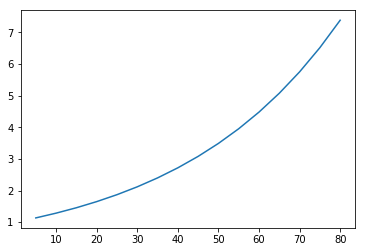

In [20]:
import pandas as pd
import numpy as np
# df_ = pd.DataFrame(index=index, columns=columns)
# df_ = df_.fillna(0) # with 0s rather than NaNs
selling_price = 60
col_names =  ['Markdown', 'Sales_Lift_Factor', 'Sale_price','Rest_Sales','Rest_Revenue']
markdown_df  = pd.DataFrame(columns = col_names)
markdown_df['Markdown'] = markdown_range
markdown_df['Sales_Lift_Factor'] = sales_lift_array
markdown_df['Sale_price'] = selling_price * (1-markdown_df['Markdown']/100)
markdown_df['Rest_Sales'] = [340,385,436,495,560,635,720,815,924,1047,1187,1345,1524,1726,1956,2000]#Actual Sales
markdown_df['Rest_Revenue'] = markdown_df['Rest_Sales'] * markdown_df['Sale_price']
plt.plot(markdown_df['Markdown'], markdown_df['Sales_Lift_Factor'])
markdown_df

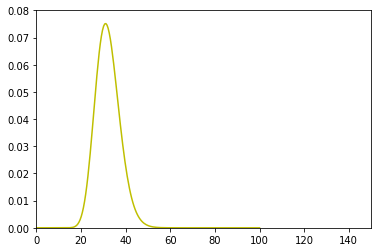

In [22]:
x = np.linspace (0, 100, 200) 
y1 = stats.gamma.pdf(x, a=29, loc=3) #a is alpha, loc is beta???
plt.plot(x, y1, "y-", label=(r'$\alpha=29, \beta=3$')) 

plt.ylim([0,0.08])
plt.xlim([0,150])
plt.show()